In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df_interaction = pd.read_csv("../data/raw/RAW_interactions.csv")

In [32]:
df_interaction.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [33]:
df_recipe = pd.read_csv("../data/raw/RAW_recipes.csv")


In [34]:
df_recipe.head()


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


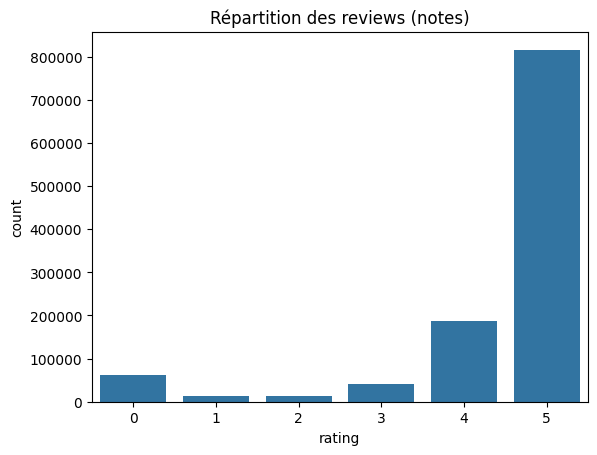

Note moyenne globale : 4.41


In [35]:
# Distribution des notes
sns.countplot(x="rating", data=df_interaction)
plt.title("Répartition des reviews (notes)")
plt.show()

# Moyenne des notes
mean_rating = df_interaction["rating"].mean()
print("Note moyenne globale :", round(mean_rating, 2))

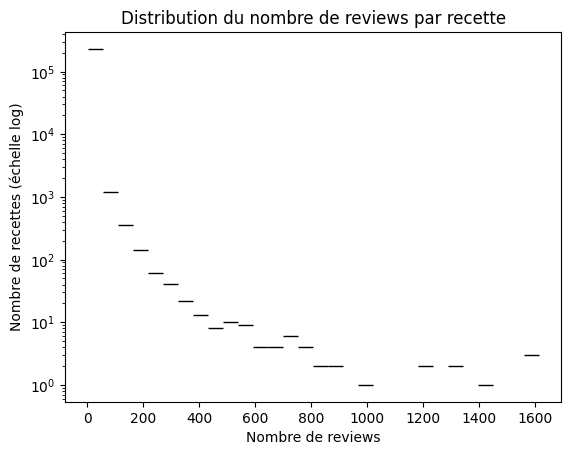

In [37]:
reviews_per_recipe = df_interaction.groupby('recipe_id').size()
sns.histplot(reviews_per_recipe, bins=30, log_scale=(False, True))  # échelle log pour mieux visualiser
plt.title("Distribution du nombre de reviews par recette")
plt.xlabel("Nombre de reviews")
plt.ylabel("Nombre de recettes (échelle log)")
plt.show()

In [47]:
# Recettes les plus commentées
top_recipes = df_interaction['recipe_id'].value_counts().head(10)
# On merge avec df_recipe pour récupérer le nom
top_recipes_df = top_recipes.reset_index()  # transforme en DataFrame
top_recipes_df.columns = ['recipe_id', 'nb_reviews']
# Ajout du nom
top_recipes_df = top_recipes_df.merge(df_recipe[['id', 'name']], left_on='recipe_id', right_on='id', how='left')
# Affichage final
print(top_recipes_df[['recipe_id', 'name', 'nb_reviews']])

   recipe_id                                               name  nb_reviews
0       2886                                  best banana bread        1613
1      27208                         to die for crock pot roast        1601
2      89204  crock pot chicken with black beans   cream cheese        1579
3      39087                         creamy cajun chicken pasta        1448
4      67256   best ever banana cake with cream cheese frosting        1322
5      54257            yes  virginia there is a great meatloaf        1305
6      22782                   jo mama s world famous spaghetti        1234
7      32204                whatever floats your boat  brownies        1220
8      69173   kittencal s italian melt in your mouth meatballs         997
9      68955                             japanese mum s chicken         904


In [38]:
# Check des ratings mal renseignés : 
missing_ratings = df_interaction['rating'].isna().sum()
print("Nombre de reviews sans note :", missing_ratings)

Nombre de reviews sans note : 0


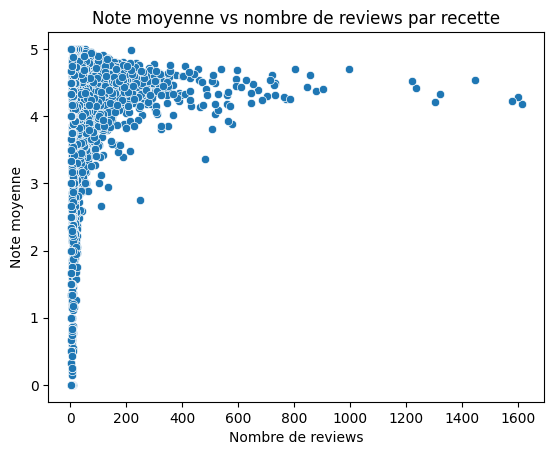

In [42]:
mean_rating_per_recipe = df_interaction.groupby('recipe_id')['rating'].mean()
reviews_per_recipe = df_interaction.groupby('recipe_id').size()
sns.scatterplot(x=reviews_per_recipe, y=mean_rating_per_recipe)
plt.xlabel("Nombre de reviews")
plt.ylabel("Note moyenne")
plt.title("Note moyenne vs nombre de reviews par recette")
plt.show()